In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from solvers import util


In [14]:
drones_3_8_combined= pd.read_excel('ADMM_mpc_3_to_8_agents.xlsm', sheet_name='Sheet1')

In [15]:
drones_3_8_combined.columns

Index(['i_trial', ' n_agents', ' t', ' converged', ' obj_trj', 'T', 'dt',
       'radius', '         SOVA_admm ', 't_solve_avg', ' t_solve_std',
       ' MAX_ITER', ' dist_to_goal'],
      dtype='object')

In [16]:
drones_3_8_combined.columns = ['i_tria','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [17]:
drones_3_8_combined = drones_3_8_combined.loc[drones_3_8_combined['converged']==True]

In [18]:
drones_3_8_combined = drones_3_8_combined.replace(to_replace='None', value=np.nan).dropna()

In [19]:
drones_3_8_combined = drones_3_8_combined.dropna()

In [20]:
drones_3_8_combined.columns

Index(['i_tria', 'n_agents', 't', 'converged', 'obj_trj', 'T', 'dt', 'radius',
       'SOVA_admm', 't_solve_avg', 't_solve_std', 'MAX_ITER', 'dist_to_goal'],
      dtype='object')

In [21]:
drones_3_8_combined['normalized_t_solve'] = drones_3_8_combined['t_solve_avg']/drones_3_8_combined['obj_trj']
# drones_3_8_combined['normalized_t_solve'] = np.log(drones_3_8_combined['t_solve_avg'])

In [22]:
drones_3_8_combined['normalized_std'] = drones_3_8_combined['t_solve_std']/drones_3_8_combined['obj_trj']

In [23]:
# plt.figure(dpi=150)
# sns.boxplot(data=drones_3_8_combined, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', palette=["m", "g"], showfliers=False,linewidth=0.8)
# legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('m')
# leg.legendHandles[1].set_color('g')
# plt.ylabel('Normalized Average Computation Time');
# plt.xlabel('Number of Agents');
# plt.savefig('results/ADMM_avg_computation_time.png')

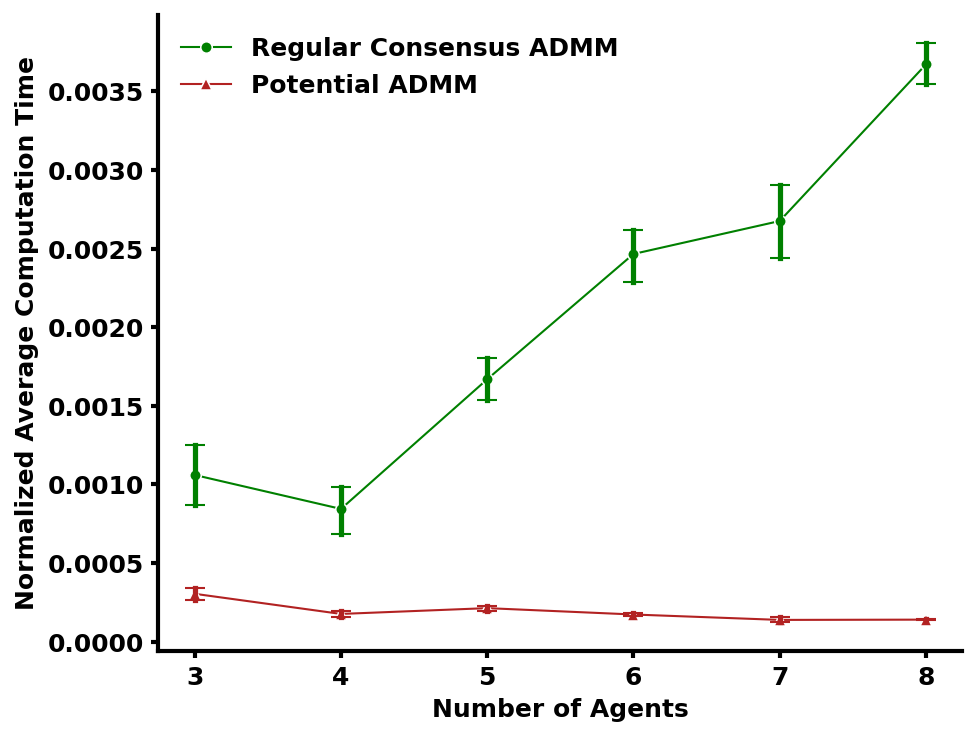

In [172]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=drones_3_8_combined, x="n_agents", y="normalized_t_solve", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=['o','^'], markersize=5.5,palette=["green", "firebrick"], err_style='bars', err_kws = err_kws)

plt.ylabel('Normalized Average Computation Time');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Regular Consensus ADMM','Potential ADMM'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/ADMM_avg_computation_time.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


In [173]:
# plt.figure(dpi=150)
# sns.boxplot(data=drones_3_8_combined, x="n_agents", y="normalized_std", hue='SOVA_admm', palette=["m", "g"], showfliers=False,linewidth=0.8)
# legend =  plt.legend(['Regular Consensus-ADMM','Potential ADMM'],fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('m')
# leg.legendHandles[1].set_color('g')
# plt.ylabel('Normalized Standard Deviations of Computation Times');
# plt.xlabel('Number of Agents');
# plt.savefig('results/ADMM_avg_std_time.png')

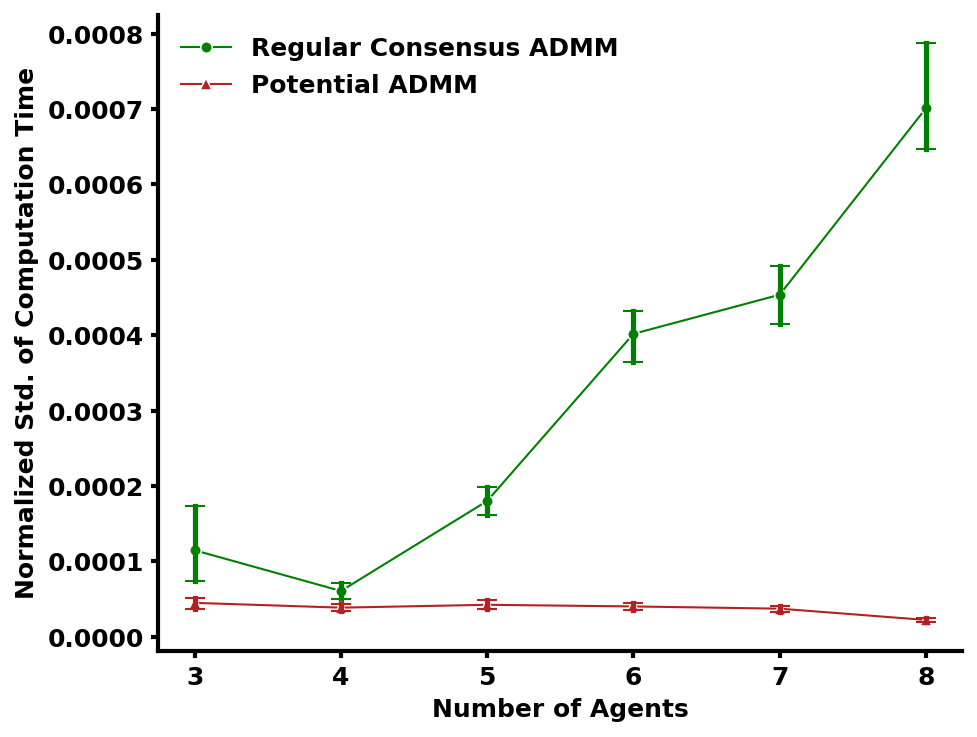

In [174]:
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
ax = sns.lineplot(data=drones_3_8_combined, x="n_agents", y="normalized_std", hue='SOVA_admm', lw=1.0, style='SOVA_admm',
             dashes=False, markers=['o','^'], markersize=5.5,palette=["green", "firebrick"], err_style='bars', err_kws = err_kws)

plt.ylabel('Normalized Std. of Computation Time');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Regular Consensus ADMM','Potential ADMM'],frameon=False,prop={'weight':'bold','size':12})

plt.savefig('results/ADMM_std_computation_time.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())


In [297]:
optimality_df = pd.read_excel('ADMM_mpc_max_Iters_1_to_10.xlsm', sheet_name='Sheet1')

In [298]:
optimality_df = optimality_df.replace(to_replace='None', value=np.nan).dropna()

In [299]:
optimality_df = optimality_df.replace(to_replace=np.inf, value=np.nan).dropna()

In [300]:
optimality_df.columns = ['i_trial','n_agents','t','converged','obj_trj','T','dt','radius','SOVA_admm','t_solve_avg','t_solve_std','MAX_ITER','dist_to_goal']

In [301]:
# optimality_df = optimality_df.groupby(['SOVA_admm','n_agents','MAX_ITER']).agg({'obj_trj': ['mean', 'std']})

In [302]:
optimality_df.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
0,0,3,3.6,False,1295.842404,8,0.1,0.5,centralized_mpc,0.422647,0.027693,None,[0.13 0.133 0.071]
1,0,3,3.6,False,1507.724848,8,0.1,0.5,True,0.281550,0.074692,1,[0.137 0.13 0.062]
2,0,3,3.6,False,1423.781251,8,0.1,0.5,centralized_mpc,0.347254,0.034705,None,[0.017 0.193 0.202]
3,0,3,3.6,False,1698.112984,8,0.1,0.5,True,0.763312,0.222628,2,[0.006 0.188 0.204]
4,0,3,1.2,True,543.811964,8,0.1,0.5,centralized_mpc,0.334100,0.018095,None,[0.079 0.078 0.021]


In [304]:
# optimality_df.columns=['mean_value','std_value']

In [305]:
# optimality_df = optimality_df.reset_index()

In [306]:
decentralized_admm = optimality_df.loc[optimality_df['SOVA_admm']==True]

In [307]:
centralized_admm= optimality_df.loc[optimality_df['SOVA_admm']=='centralized_mpc']

In [308]:
centralized_admm.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
0,0,3,3.6,False,1295.842404,8,0.1,0.5,centralized_mpc,0.422647,0.027693,None,[0.13 0.133 0.071]
2,0,3,3.6,False,1423.781251,8,0.1,0.5,centralized_mpc,0.347254,0.034705,None,[0.017 0.193 0.202]
4,0,3,1.2,True,543.811964,8,0.1,0.5,centralized_mpc,0.334100,0.018095,None,[0.079 0.078 0.021]
6,0,3,1.4,True,836.399225,8,0.1,0.5,centralized_mpc,0.342919,0.021259,None,[0.056 0.067 0.095]
8,0,3,3.6,False,2311.867325,8,0.1,0.5,centralized_mpc,0.352771,0.010076,None,[0.397 0.426 0.267]


In [309]:
decentralized_admm.head()

,i_trial,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal
1,0,3,3.6,False,1507.724848,8,0.1,0.5,True,0.281550,0.074692,1,[0.137 0.13 0.062]
3,0,3,3.6,False,1698.112984,8,0.1,0.5,True,0.763312,0.222628,2,[0.006 0.188 0.204]
5,0,3,1.2,True,607.180803,8,0.1,0.5,True,0.486333,0.065603,3,[0.08 0.069 0.022]
7,0,3,1.5,True,1388.533177,8,0.1,0.5,True,0.858977,0.197228,4,[0.045 0.079 0.081]
9,0,3,3.6,False,3251.682897,8,0.1,0.5,True,1.837560,0.466774,5,[0.399 0.443 0.262]


In [313]:
optimality_df = optimality_df.loc[optimality_df['MAX_ITER'].isin([1,5,10])]

In [330]:
decentralized_admm = decentralized_admm.loc[decentralized_admm['MAX_ITER'].isin([1,5,10])]

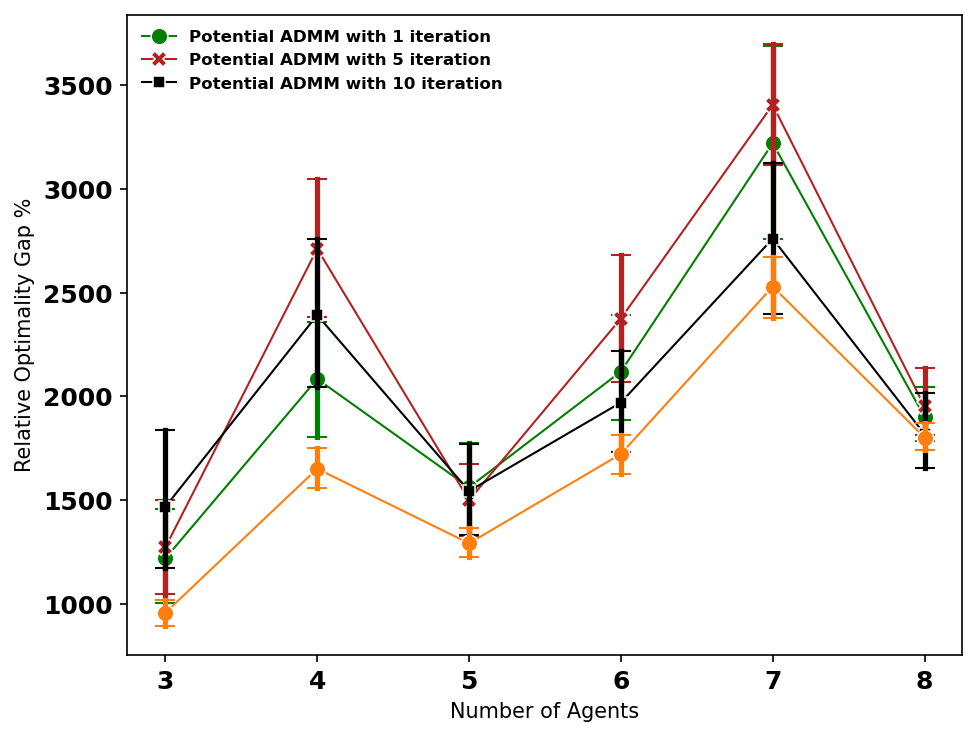

In [336]:
#This comparison is against a centralized MPC without consensus, not very fair!!!
plt.figure(dpi=150)
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
sns.lineplot(data=decentralized_admm, x="n_agents", y="obj_trj", hue='MAX_ITER', lw=1.0, style='MAX_ITER',dashes=False,
              markers=True, markersize=8, palette=["green", "firebrick","black"],err_style='bars', err_kws = err_kws)
sns.lineplot(data=centralized_admm, x="n_agents", y="obj_trj", lw=1.0, style='MAX_ITER',dashes=False,
              markers=True, markersize=8, palette=["grey"],err_style='bars', err_kws = err_kws)
plt.ylabel('Relative Optimality Gap %');
plt.xlabel('Number of Agents');

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight='bold')
ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')

plt.legend(labels=['Potential ADMM with 1 iteration',
                   'Potential ADMM with 5 iteration',
                   'Potential ADMM with 10 iteration',
                   ],frameon=False,prop={'weight':'bold','size':8},loc = 'best')

plt.savefig('results/relative_optimality_gap.png', bbox_inches = 'tight', dpi=250, facecolor = ax.get_facecolor())

In [188]:
success_count=df.groupby(['SOVA_admm','n_agents'])['converged'].value_counts()

In [189]:
success_count

SOVA_admm  n_agents  converged
False      3         1.0          18
           4         1.0          15
           5         1.0          23
           6         1.0          23
           7         1.0          14
           8         1.0          30
True       3         1.0          24
           4         1.0          24
           5         1.0          28
           6         1.0          26
           7         1.0          20
           8         1.0          30
Name: converged, dtype: int64

In [190]:
success_count_df = pd.DataFrame(success_count)

In [191]:
success_count_df=success_count_df.rename(columns={'converged':'count'})

In [192]:
success_count_df = success_count_df.reset_index()

In [193]:
success_count_df

,SOVA_admm,n_agents,converged,count
0,False,3,1.0,18
1,False,4,1.0,15
2,False,5,1.0,23
3,False,6,1.0,23
4,False,7,1.0,14
5,False,8,1.0,30
6,True,3,1.0,24
7,True,4,1.0,24
8,True,5,1.0,28
9,True,6,1.0,26


In [194]:
centralized = success_count_df.loc[success_count_df['SOVA_admm']==False]

In [195]:
distributed = success_count_df.loc[success_count_df['SOVA_admm']==True]

In [196]:
centralized.loc[centralized['converged']==True]['count'].sum()/180 #probability of convergence out of all trials

0.6833333333333333

In [197]:
distributed.loc[distributed['converged']==True]['count'].sum()/180

0.8444444444444444

In [198]:
success_count_df

,SOVA_admm,n_agents,converged,count
0,False,3,1.0,18
1,False,4,1.0,15
2,False,5,1.0,23
3,False,6,1.0,23
4,False,7,1.0,14
5,False,8,1.0,30
6,True,3,1.0,24
7,True,4,1.0,24
8,True,5,1.0,28
9,True,6,1.0,26


### Comparison w/ DP-ilQR:

In [341]:
dpilqr_3_to_8_agents = pd.read_excel('dpilqr_3_8_agents.xlsm', sheet_name='Sheet1')

In [342]:
dpilqr_3_to_8_agents.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [343]:
dpilqr_3_to_8_agents = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['converged']==True]

In [351]:
dpilqr_results = dpilqr_3_to_8_agents.loc[dpilqr_3_to_8_agents['centralized']==False]

In [352]:
dpilqr_results.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [349]:
# dpilqr_comparison_df = dpilqr_results.groupby(['n_agents']).agg({'J': ['mean', 'std']})

In [353]:
# dpilqr_comparison_df

In [354]:
# dpilqr_comparison_df.columns=['mean_value','std_value']

In [355]:
# dpilqr_comparison_df = dpilqr_comparison_df.reset_index()

In [356]:
# dpilqr_comparison_df['SOVA_admm']=False

In [357]:
# admm_dpilqr_comparison =pd.concat((decentralized_admm,dpilqr_comparison_df))

In [358]:
# decentralized_admm_comparison.columns

In [363]:
# dpilqr_comparison_df

In [361]:
# admm_dpilqr_comparison = admm_dpilqr_comparison.loc[admm_dpilqr_comparison['SOVA_admm']==True]

In [364]:
dpilqr_results.head()

,n_agents,trial,centralized,J,horizon,dt,converged,times,dist_left
0,3,0,False,632.247133,8,0.1,True,0.020832,"[0.08713813708025549, 0.0602860545647581, 0.03..."
1,3,1,False,1194.222717,8,0.1,True,0.059418,"[0.09974560245842003, 0.03773806272288654, 0.0..."
2,3,2,False,730.520005,8,0.1,True,0.039853,"[0.09920918487331863, 0.0666942255881801, 0.09..."
3,3,3,False,680.692175,8,0.1,True,0.016438,"[0.06604134328275323, 0.02728557933646599, 0.0..."
4,3,4,False,948.543104,8,0.1,True,0.025794,"[0.06962963788774379, 0.08250096513209344, 0.0..."


In [362]:
drones_3_8_combined.head()

,i_tria,n_agents,t,converged,obj_trj,T,dt,radius,SOVA_admm,t_solve_avg,t_solve_std,MAX_ITER,dist_to_goal,normalized_t_solve,normalized_std
0,0.0,3,1.9,1.0,1131.695506,8.0,0.1,0.5,False,0.882948,0.137242,3.0,[0.091 0.023 0.077],0.000780,0.000121
1,0.0,3,1.6,1.0,2462.952611,8.0,0.1,0.5,True,0.389646,0.051050,3.0,[0.096 0.056 0.095],0.000158,0.000021
4,2.0,3,1.6,1.0,2188.728334,8.0,0.1,0.5,False,0.761009,0.048872,3.0,[0.064 0.034 0.086],0.000348,0.000022
5,2.0,3,1.6,1.0,2133.528468,8.0,0.1,0.5,True,0.336251,0.056193,3.0,[0.066 0.034 0.086],0.000158,0.000026
6,3.0,3,1.2,1.0,454.775939,8.0,0.1,0.5,False,0.749026,0.045300,3.0,[0.091 0.081 0.051],0.001647,0.000100


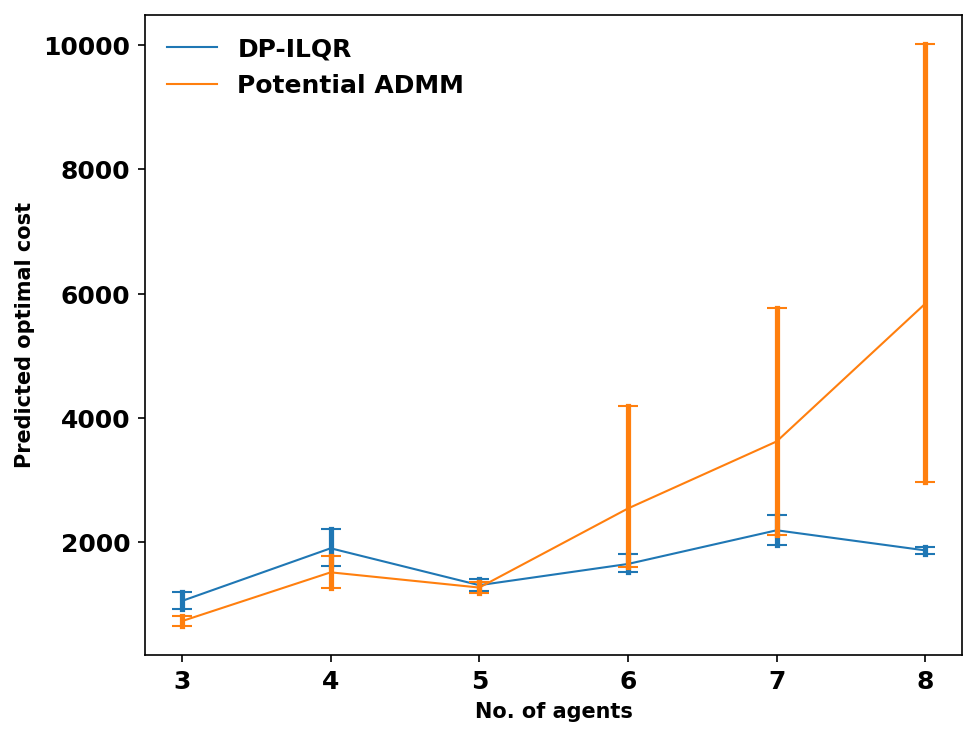

In [382]:
plt.figure(dpi=150)
# sns.lineplot(data=drones_3_8_combined , x='n_agents', y='obj_trj',label='Potential ADMM')
# sns.lineplot(data=dpilqr_results, x='n_agents',y='J' ,label='DP-ILQR')
err_kws = {'capsize': 5, 'capthick':1, 'elinewidth':2.5}
sns.lineplot(data=drones_3_8_combined, x="n_agents", y="obj_trj", lw=1.0, dashes=False,
              markers=True, markersize=8, palette=["green"],err_style='bars', err_kws = err_kws,label='Potential Consensus-ADMM')
sns.lineplot(data=dpilqr_results, x="n_agents", y="J", lw=1.0, dashes=False,
              markers=True, markersize=8, palette=["grey"],err_style='bars', err_kws = err_kws,label='DP-ILQR')
# plt.xlabel('No of agents')
# plt.ylabel('Average Trajectory Cost')

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.0)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(width=2.0)

plt.xticks(size=12, weight= 'bold')
plt.yticks(size=12, weight= 'bold')
# ax.set_xlabel('Predicted optimal cost', fontsize=12, weight='bold')
# ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight='bold')
plt.ylabel('Predicted optimal cost',fontsize=10,weight='bold')
plt.xlabel('No. of agents',fontsize=10,weight='bold')
plt.legend(frameon=False,prop={'weight':'bold','size':12},loc = 'best')

plt.savefig('results/ADMM_vs_DPILQR.png')